<a href="https://colab.research.google.com/github/AnshikaaAgarwal/Clustering-On-Dummy-Datasets/blob/main/Image_Segmentation_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import math
from sklearn.metrics import silhouette_score
from google.colab import files
from PIL import Image
import os

Loading Image

JPG Image


In [13]:
image_path = '/content/imgcheck.jpg'
image = cv2.imread(image_path)
#Since cv2 reads in the form of BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.size)

614196


In [14]:
image_arr = np.array(image)
print("Shape of Image :", image_arr.shape)
# Reshape the image to a 2D array of pixels (n_pixels, 3)
pixels = image_arr.reshape(-1, 3)
print("RGB value of each pixel :",pixels)
print(pixels.shape)


Shape of Image : (363, 564, 3)
RGB value of each pixel : [[13 14  9]
 [12 13  8]
 [12 13  8]
 ...
 [12 12 10]
 [12 12 10]
 [12 12 10]]
(204732, 3)


Calinski-Harabasz Index: Use when you want to prioritize cluster separation and compactness.



```

```


Davies-Bouldin Index: Use when you want to prioritize cluster similarity and dissimilarity.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 10 clusters: 0.863
Calinski-Harabasz Index for 10 clusters: 420935.319


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 20 clusters: 0.882
Calinski-Harabasz Index for 20 clusters: 383459.727


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 30 clusters: 0.931
Calinski-Harabasz Index for 30 clusters: 350341.441


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 40 clusters: 0.951
Calinski-Harabasz Index for 40 clusters: 324066.932


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 50 clusters: 0.960
Calinski-Harabasz Index for 50 clusters: 302070.838


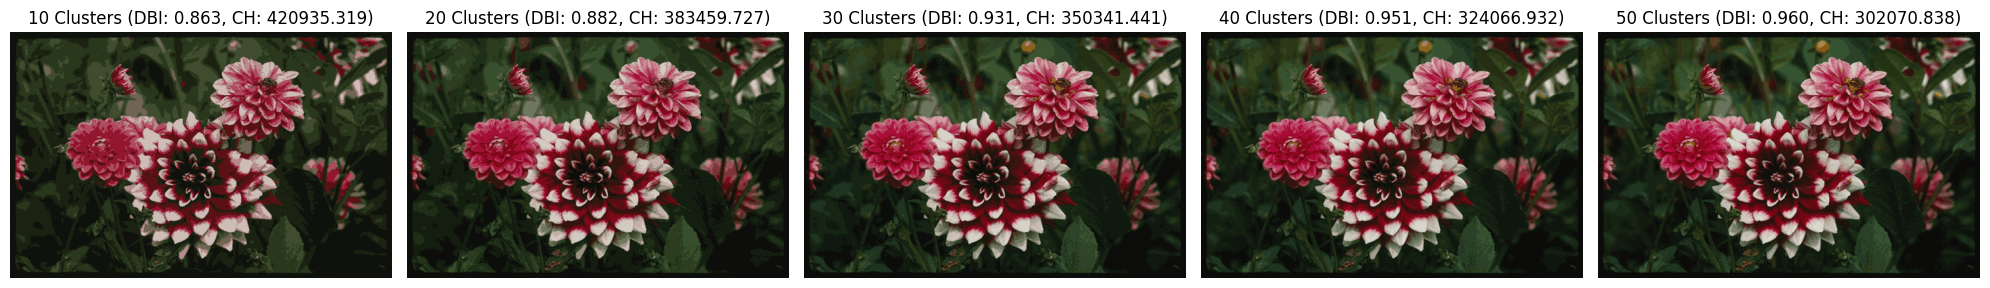

In [59]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

cluster_numbers = [10,20,30,40,50]
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for idx, n_clusters_multi in enumerate(cluster_numbers):

    kmeans_different = KMeans(n_clusters=n_clusters_multi, random_state=42)
    kmeans_different.fit(pixels)

    centroids_different = kmeans_different.cluster_centers_
    labels_different = kmeans_different.labels_

    clustered_pixels_different = centroids_different[labels_different]
    clustered_image_different = clustered_pixels_different.reshape(image.shape).astype(np.uint8)

    dbi_avg = davies_bouldin_score(pixels, labels_different)
    ch_avg = calinski_harabasz_score(pixels, labels_different)
    print(f'Davies-Bouldin Index for {n_clusters_multi} clusters: {dbi_avg:.3f}')
    print(f'Calinski-Harabasz Index for {n_clusters_multi} clusters: {ch_avg:.3f}')

    axs[idx].imshow(clustered_image_different)
    axs[idx].set_title(f'{n_clusters_multi} Clusters (DBI: {dbi_avg:.3f}, CH: {ch_avg:.3f})')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()





The DBI values are increasing as the number of clusters increases, which suggests that the clusters are becoming more distinct and well-separated.
The DBI values are relatively high (> 0.8), indicating that the clusters are well-separated and have a low degree of similarity.


```

```
The CHI values are decreasing as the number of clusters increases, which suggests that the clusters are becoming more dense and well-separated.
The CHI values are very high (> 300000), indicating that the clusters are well-separated and have a high degree of density.



Applying K-Means
number of clusters used=5

In [49]:
n_clusters = 32
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixels)
centroids = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_
print(labels)
print(labels.size)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 3 3 3]
204732


the more the number of clusters the better it goes


In [50]:
clustered_pixels = centroids[labels]
clustered_img=clustered_pixels.reshape(image.shape)

RGB values of Centroids

In [51]:
print("Cluster centroids (RGB values):")
for i in range(len(centroids)):
    print(f"Centroid {i + 1}: {centroids[i]}")

Cluster centroids (RGB values):
Centroid 1: [153 149 135]
Centroid 2: [42 51 21]
Centroid 3: [144   9  32]
Centroid 4: [11 12 10]
Centroid 5: [111  40  44]
Centroid 6: [215 210 201]
Centroid 7: [54 79 46]
Centroid 8: [191  89 116]
Centroid 9: [110  68  68]
Centroid 10: [212 158 165]
Centroid 11: [114   8  20]
Centroid 12: [16 23 14]
Centroid 13: [28 45 24]
Centroid 14: [59 19 16]
Centroid 15: [199 128 140]
Centroid 16: [119 125 105]
Centroid 17: [203 190 181]
Centroid 18: [38 60 37]
Centroid 19: [51 66 28]
Centroid 20: [138 101  27]
Centroid 21: [21 34 18]
Centroid 22: [76 52 37]
Centroid 23: [180  57  90]
Centroid 24: [ 97 105  82]
Centroid 25: [86 14 17]
Centroid 26: [179 171 159]
Centroid 27: [170  15  60]
Centroid 28: [170 118 111]
Centroid 29: [38 21 14]
Centroid 30: [147  48  64]
Centroid 31: [76 88 55]
Centroid 32: [148  84  91]


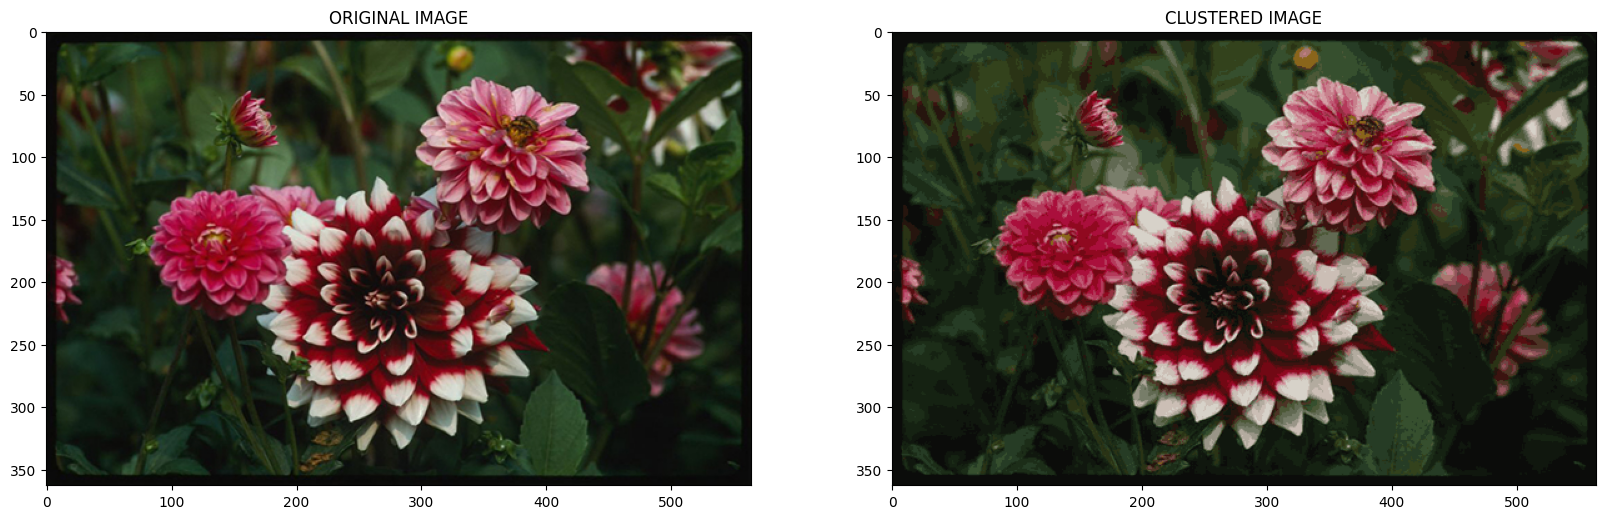

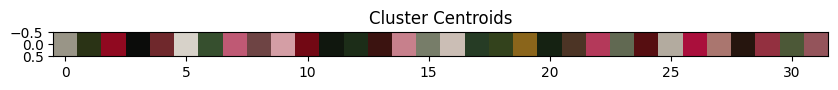

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image)
axs[0].set_title('ORIGINAL IMAGE')

axs[1].imshow(clustered_img)
axs[1].set_title('CLUSTERED IMAGE')


centroid_colors = np.array(centroids, dtype=np.uint8).reshape(1, n_clusters, 3)
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(centroid_colors)
ax.set_title('Cluster Centroids')
plt.show()


In [54]:

clustered_img = clustered_img.astype(np.uint8)  # Convert to uint8 type
img = Image.fromarray(clustered_img)
img.save('clustered_image_flower_32cluster.jpg')
files.download('clustered_image_flower_32cluster.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

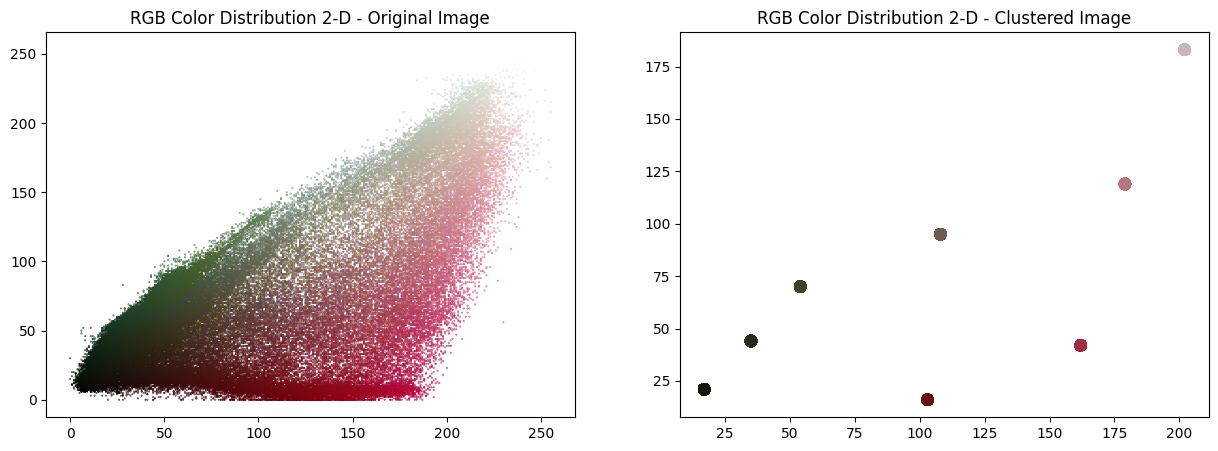

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# original image RGB plot
axs[0].scatter(pixels[:, 0], pixels[:, 1], c=pixels / 255.0, marker='.',s=0.5)
axs[0].set_title('RGB Color Distribution 2-D - Original Image')


# clustered image RGB plot
axs[1].scatter(clustered_pixels[:, 0], clustered_pixels[:, 1], c=clustered_pixels / 255.0, marker='.',s=250)
axs[1].set_title('RGB Color Distribution 2-D - Clustered Image')


plt.show()

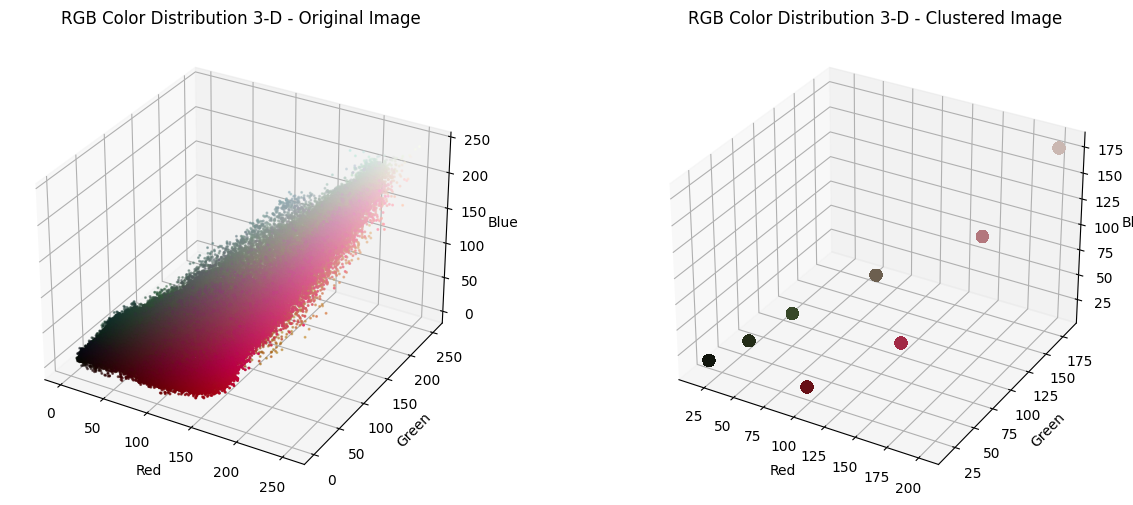

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))


ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, marker='.', s=5)
ax1.set_title('RGB Color Distribution 3-D - Original Image')
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(clustered_pixels[:, 0], clustered_pixels[:, 1], clustered_pixels[:, 2], c=clustered_pixels / 255.0, marker='.', s=250)
ax2.set_title('RGB Color Distribution 3-D - Clustered Image')
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue')


plt.show()

In [55]:

original_image_path = '/content/drive/MyDrive/Compression/imgcheck.jpg'
file_size = os.path.getsize(original_image_path)
print(f"Original Image size: {file_size / (1024):.2f} KB")

clustered_img_path='/content/clustered_image_flower_32cluster.jpg'
clustered_img_size=os.path.getsize(clustered_img_path)
print(f"Clustered Image size: { clustered_img_size/ (1024):.2f} KB")


Original Image size: 160.17 KB
Clustered Image size: 34.37 KB


PNG Image


In [28]:
image_path_png = '/content/landscapepng.png'
image_png = cv2.imread(image_path_png)
#Since cv2 reads in the form of BGR
image_png = cv2.cvtColor(image_png, cv2.COLOR_BGR2RGB)
print(image_png.size)

29136000


In [29]:
image_arr_png = np.array(image_png)
print("Shape of Image :", image_arr_png.shape)
# Reshape the image to a 2D array of pixels (n_pixels, 3)
pixels_png = image_arr_png.reshape(-1, 3)
print("RGB value of each pixel :",pixels_png)
print(pixels_png.shape)

Shape of Image : (2428, 4000, 3)
RGB value of each pixel : [[ 78 104 121]
 [ 78 104 121]
 [ 77 104 121]
 ...
 [ 39  69   7]
 [ 41  79   6]
 [ 46  87   8]]
(9712000, 3)


In [30]:
n_clusters_png=40
kmeans_png = KMeans(n_clusters=n_clusters_png)
kmeans_png.fit(pixels_png)
centroids_png = kmeans_png.cluster_centers_.astype(int)
labels_png = kmeans_png.labels_
print(labels_png)
print(labels_png.size)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[28 28 28 ... 36 36 36]
9712000


In [31]:
clustered_pixels_png = centroids_png[labels_png]
clustered_img_png=clustered_pixels_png.reshape(image_png.shape)

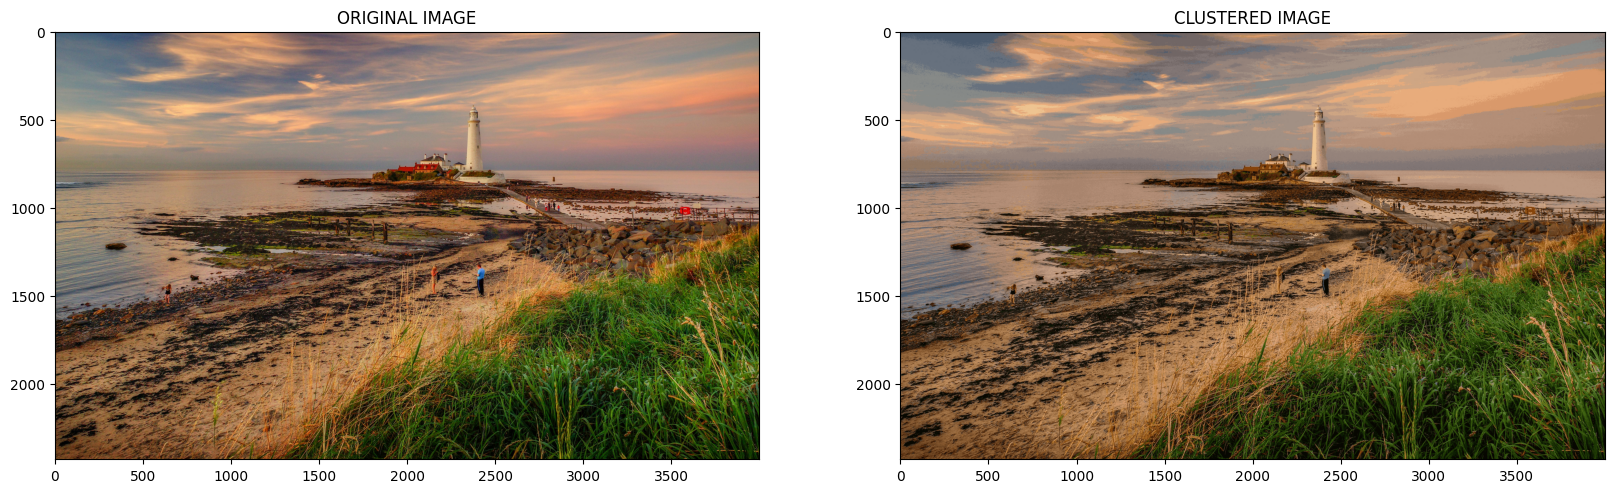

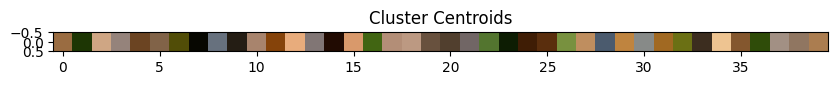

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image_png)
axs[0].set_title('ORIGINAL IMAGE')

axs[1].imshow(clustered_img_png)
axs[1].set_title('CLUSTERED IMAGE')


centroid_colors_png = np.array(centroids_png, dtype=np.uint8).reshape(1, n_clusters_png, 3)
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(centroid_colors_png)
ax.set_title('Cluster Centroids')
plt.show()

In [34]:
clustered_img_png = clustered_img_png.astype(np.uint8)
img = Image.fromarray(clustered_img_png)
img.save('clustered_image_landscape.png')
files.download('clustered_image_landscape.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
original_png_image_path = '/content/drive/MyDrive/Compression/landscapepng.png'
png_file_size = os.path.getsize(original_png_image_path)
print(f"Original Image size: {png_file_size / (1024*1024):.2f} MB")

clustered_png_img_path='/content/drive/MyDrive/Compression/clustered_image_landscape.png'
clustered_png_img_size=os.path.getsize(clustered_png_img_path)
print(f"Clustered Image size: { clustered_png_img_size/ (1024*1024):.2f} MB")

Original Image size: 18.75 MB
Clustered Image size: 6.70 MB
